1、添加y方向，宽度4cm；

2、中子入射在x方向分布为高斯分布（0，）；

In [1]:
const Double_t D=500.;//cm, distance between target and the scin.(Center)
const Double_t L=100.;//cm, half length of the scin.
const Double_t dD=5.;//cm, thickness of the scin.
const Double_t TRes=1.;//ns, time resolution(FWHM) of the scintillator.
const Double_t Lambda=380.;//cm, attenuation lenght of the scin.
const Double_t QRes=0.1;//relative energy resolution(FWHM) of the scin. 
const Double_t Vsc=7.5;//ns/cm, speed of light in the scin.
const Double_t En0=100;//MeV, average neutron energy
const Double_t EnRes=50.;//MeV, energy spread of neutron(FWHM)
const Double_t Eg0=1;//MeV, gamma energy  
const Double_t Rg=0.3;//ratio of gamma,ratio of neutron 1-Rg 
const Double_t dY=4.;//width
//x distribution Gas(0,)
const Double_t XRes=35;//cm,FWHM of X
//const Double_t Y;

//1. 声明tree中Branch的变量
Double_t X;//入射x位置
Double_t Y;
Double_t d;//飞行距离
Double_t E;//能量
int pID;    //粒子种类，n:pid=1,g:pid=0
Double_t TOF, CTOF;//TOF:粒子实际飞行时间，cTOF：计算得到的TOF
Double_t Tu, Td;
Double_t Qu, Qd;
Double_t tu_off=5.5;//time offset，//束流飞行时间+PMT的渡越时间+电缆上的传输时间
Double_t td_off=20.4;//time offset


//

//2. 定义新ROOT文件，声明新的Tree 
TFile *opf=new TFile("tree.root","recreate");//新文件tree.root，指针 *opf
TTree *opt=new TTree("tree","tree structure");//新tree，指针 *opt

//3. 将变量地址添加到tree结构中
//第一个参数为变量名称，第二个为上面定义的变量地址，第三个为变量的类型说明，D表示Double_t，I表示 Int_t。
opt->Branch("X", &X, "X/D");
opt->Branch("Y", &Y, "Y/D");
opt->Branch("d", &d, "d/D");
opt->Branch("E", &E, "E/D");
opt->Branch("TOF", &TOF, "TOF/D");
opt->Branch("CTOF",&CTOF,"CTOF/D");
opt->Branch("pID", &pID, "pID/I");
opt->Branch("Tu", &Tu, "Tu/D");
opt->Branch("Td", &Td, "Td/D");
opt->Branch("Qu", &Qu, "Qu/D"); 
opt->Branch("Qd", &Qd, "Qd/D");  

// histogram，ROOT文件中除了TTree结构外，还可存储histogram，graph等
TH1D *hctof=new TH1D("hctof","neutron time of flight",1000,0,100);
TH2D *hExy=new TH2D("hExy","neutron distribution in x and y axis",1200,-60,60,200,-5,5);
TRandom3 *gr=new TRandom3(0);//声明随机数

//4. 循环，计算变量的值，逐事件往tree结构添加变量值。
for(int i=0;i<100000;i++){
    X=gr->Gaus(0, XRes/2.35);
    Double_t Dr=D+gr->Uniform(-0.5,0.5)*dD;//粒子在探测器厚度范围内均匀产生光信号
    Y=gr->Uniform(-0.5,0.5)*dY;//
    d=TMath::Sqrt(Dr*Dr+X*X+Y*Y);//粒子实际飞行距离;
    if(gr->Uniform() < Rg) { //判断为gamma入射
       pID=0;
       E=Eg0;
       TOF=3.333*(d*0.01);
    }
    else {  //neutron
        pID=1;
        E=gr->Gaus(En0, EnRes/2.35); // energy of neutrons
        TOF=72.29824/TMath::Sqrt(E)*(d*0.01);//ns
    }
    Tu=TOF+(L-X)/Vsc+gr->Gaus(0,TRes/2.35)+tu_off;
    Td=TOF+(L+X)/Vsc+gr->Gaus(0,TRes/2.35)+td_off;
    CTOF=(Tu+Td)/2.;//simplified calculation.
    hctof->Fill(CTOF);
    hExy->Fill(X,Y);
//neutron：energy of recoil proton in plas. q0=0-En； gamma：q0=0-Egamma，compton plateau
    Double_t Q0=E*gr->Uniform();
    Qu=Q0*TMath::Exp(-(L-X)/Lambda);
    Qu=gr->Gaus(Qu,Qu*QRes/2.35);//QRes, relative energy resolution
    Qd=Q0*TMath::Exp(-(L+X)/Lambda);
    Qd=gr->Gaus(Qd,Qd*QRes/2.35);
    opt->Fill();//5.将计算好的变量值填到Tree中

    if(i%1000==0) cout<<i<<" ";
}
cout<<endl;
// 6.将数据写入root文件中
hctof->Write();//写入预定义的histogram到文件
hExy->Write();
opt->Write();//写入TTree到文件
opf->Close();//关闭文件

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 64000 65000 66000 67000 68000 69000 70000 71000 72000 73000 74000 75000 76000 77000 78000 79000 80000 81000 82000 83000 84000 85000 86000 87000 88000 89000 90000 91000 92000 93000 94000 95000 96000 97000 98000 99000 


In [2]:
TFile *ipf=new TFile("tree.root");
ipf->ls()

TFile**		tree.root	
 TFile*		tree.root	
  KEY: TH1D	hctof;1	neutron time of flight
  KEY: TH2D	hExy;1	neutron distribution in x and y axis
  KEY: TTree	tree;1	tree structure


In [3]:
tree->Print()

******************************************************************************
*Tree    :tree      : tree structure                                         *
*Entries :   100000 : Total =         8428001 bytes  File  Size =    7138415 *
*        :          : Tree compression factor =   1.18                       *
******************************************************************************
*Br    0 :X         : X/D                                                    *
*Entries :   100000 : Total  Size=     802585 bytes  File Size  =     758680 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression=   1.06     *
*............................................................................*
*Br    1 :Y         : Y/D                                                    *
*Entries :   100000 : Total  Size=     802585 bytes  File Size  =     559683 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression=   1.43     *
*...................................................

In [4]:
tree->Show(0);

======> EVENT:0
 X               = 13.8397
 Y               = -0.895444
 d               = 497.951
 E               = 1
 TOF             = 16.5967
 CTOF            = 42.991
 pID             = 0
 Tu              = 33.6331
 Td              = 52.349
 Qu              = 0.244159
 Qd              = 0.216274


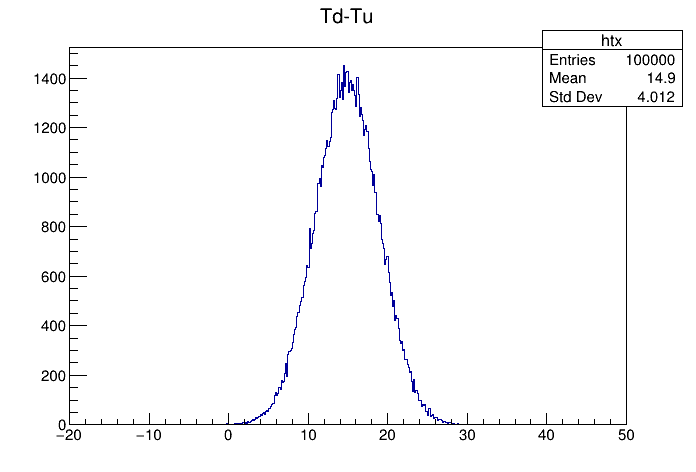

In [5]:
TCanvas *c1=new TCanvas();//* 在ROOT环境下可省略
c1->Clear();//* 在ROOT环境下可省略
tree->Draw("Td-Tu>>htx(500,-20,50)");//位置一维分布
c1->Draw();

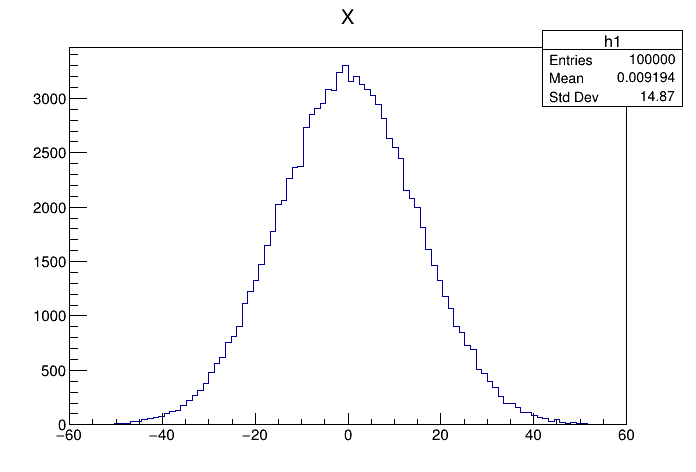

In [6]:
c1->Clear();//* 在ROOT环境下可省略
tree->Draw("X>>h1(100,-60,60)");//位置一维分布
c1->Draw();

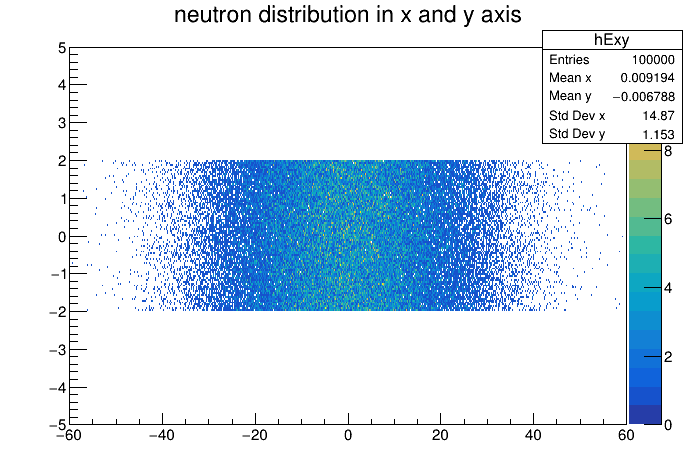

In [7]:
c1->Clear();
TH2D *hh=(TH2D*) ipf->Get("hExy");
hh->Draw("colz");
c1->Draw();

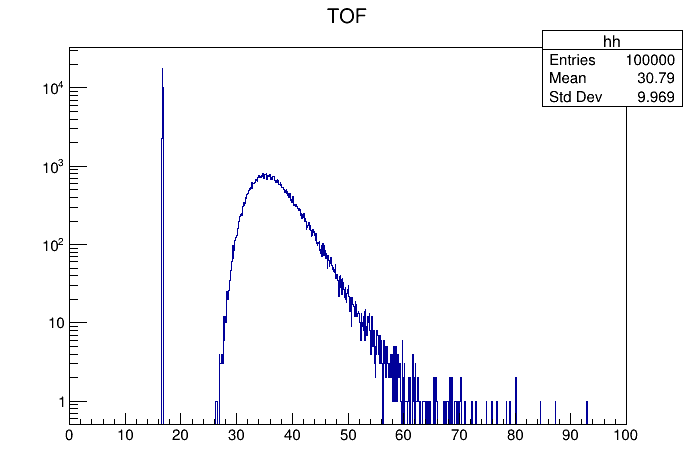

In [8]:
c1->Clear();
tree->Draw("TOF>>hh(1000,0,100)");//实际飞行时间
c1->SetLogy();
c1->Draw();